# IPython Simulation for the toilet-paper problem proposed by Knuth in 1984

In [6]:
import numpy as np 
import matplotli b.pyplot as plt
import random


## 2-roll case

leftOver(num,p) returns the simulated result of the number of toilet paper leftover after one random process while both rolls start from number of toilet paper num and the proportion of bigger-chooser p; simulated(trial, num, p) returns a list of simulated result of size trial using leftOver(num,p)

In [36]:
def leftOver(num,p):
    n=num
    m=num
    while (n*m>0):
        if (m==n):
            t=random.random()
            if (t<0.5):
                n=n-1
            else:
                m=m-1
        else:
            r = random.random()
            if (r<p):
                if (n<m):
                    m=m-1
                else:
                    n=n-1
            else:
                if (n>m):
                    m=m-1
                else:
                    n=n-1
                
    return max(m,n)
def simulation(trial,num,p):
    res=[]
    for i in range(trial):
        res.append(leftOver(num,p))
    return res

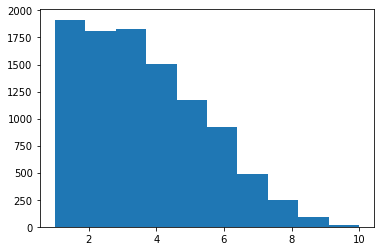

In [40]:
plt.hist(simulation(10000,10,0.5))
plt.show()